<a href="https://colab.research.google.com/github/hildazaqya/project-capstone/blob/main/firna/Foodection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Data from Kaggle

This data is collect mannually from many website, dan also in the data was captured using a smartphone camera.

In [ ]:
#kaggle
!pip install kaggle

In [1]:
#this file from kaggle API personnal account
from google.colab import files

# Upload kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"smjayyy","key":"a86a230a085a77cff7a5851725589584"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
##link dataset in Kaggle.com
!kaggle datasets download -d alinesellwia/food-freshness

100% 2.66G/2.67G [00:29<00:00, 115MB/s]
100% 2.67G/2.67G [00:29<00:00, 96.5MB/s]


In [4]:
#new directory for stores temporary data
!mkdir data

In [5]:
#unzip the data
!unzip -q food-freshness.zip -d /content/data

#Install Library

In [6]:
#Train Data, Augmentation
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, Model, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Dropout

#Transfer Learning
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications import EfficientNetB0

#optimizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

#interach with OS -> make directory
import os

#evaluation
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

#Visualization
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#for save model
from tensorflow.keras.models import load_model
from google.colab import files


#Set the directory to easily navigate to the generator

In [7]:
base_dir= '/content/data/Foodection Dataset'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/test'))

Contents of base directory:
['test', 'train']

Contents of train directory:
['wortel_busuk', 'tomat_segar', 'tomat_busuk', 'jeruk_segar', 'tomat_segar_sedang', 'wortel_segar_sedang', 'wortel_segar', 'jeruk_busuk', 'jeruk_segar_sedang']

Contents of validation directory:
['wortel_busuk', 'tomat_segar', 'tomat_busuk', 'jeruk_segar', 'wortel_segar_sedang', 'wortel_segar', 'jeruk_busuk', 'jeruk_segar_sedang', 'tomat _segar_sedang']


In [8]:
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Specify class of the directory train
train_jeruksegar_dir = os.path.join(train_dir, 'jeruk_segar')
train_wortelsegar_dir = os.path.join(train_dir, 'wortel_segar')
train_wortelsegarsedang_dir = os.path.join(train_dir, 'wortel_segar')
train_tomatbusuk_dir = os.path.join(train_dir, 'tomat_busuk')
train_jeruksegarsedang_dir = os.path.join(train_dir, 'jeruk_segar_sedang')
train_jerukbusuk_dir = os.path.join(train_dir, 'jeruk_busuk')
train_wortelbusuk_dir = os.path.join(train_dir, 'wortel_busuk')
train_tomatsegar_dir = os.path.join(train_dir, 'tomat_segar')
train_tomatsegarsedang_dir = os.path.join(train_dir, 'tomat_segar_sedang')

# Specify class of the directory test
test_jeruksegar_dir = os.path.join(test_dir, 'jeruk_segar')
test_wortelsegar_dir = os.path.join(test_dir, 'wortel_segar')
test_wortelsegarsedang_dir = os.path.join(test_dir, 'wortel_segar_sedang')
test_tomatbusuk_dir = os.path.join(test_dir, 'tomat_busuk')
test_jeruksegarsedang_dir = os.path.join(test_dir, 'jeruk_segar_sedang')
test_jerukbusuk_dir = os.path.join(test_dir, 'jeruk_busuk')
test_wortelbusuk_dir = os.path.join(test_dir, 'wortel_busuk')
test_tomatsegar_dir = os.path.join(test_dir, 'tomat_segar')
test_tomatsegarsedang_dir = os.path.join(test_dir, 'tomat _segar_sedang')

In [9]:
train_jeruksegar_fnames = os.listdir(train_jeruksegar_dir)
train_wortelsegar_fnames = os.listdir(train_wortelsegar_dir)
train_wortelsegarsedang_fnames = os.listdir(train_wortelsegarsedang_dir)
train_tomatbusuk_fnames = os.listdir(train_tomatbusuk_dir)
train_jeruksegarsedang_fnames = os.listdir(train_jeruksegarsedang_dir)
train_jerukbusuk_fnames = os.listdir(train_jerukbusuk_dir)
train_wortelbusuk_fnames = os.listdir(train_wortelbusuk_dir)
train_tomatsegar_fnames = os.listdir(train_tomatsegar_dir)
train_tomatsegarsedang_fnames = os.listdir(train_tomatsegarsedang_dir)

# Every Class Len

In [10]:
print('total training jeruk segar images :', len(os.listdir(train_jeruksegar_dir)))
print('total training wortel segar images :', len(os.listdir( train_wortelsegar_dir)))
print('total training wortel segar sedang images :', len(os.listdir(train_wortelsegarsedang_dir)))
print('total training tomat busuk images :', len(os.listdir(train_tomatbusuk_dir)))
print('total training jeruk segar sedang images :', len(os.listdir(train_jeruksegarsedang_dir)))
print('total training jeruk busuk images :', len(os.listdir(train_jerukbusuk_dir)))
print('total training wortel busuk images :', len(os.listdir(train_wortelbusuk_dir)))
print('total training tomat segar images :', len(os.listdir(train_tomatsegar_dir)))
print('total training tomat segar sedang images :', len(os.listdir(train_tomatsegarsedang_dir)))

print('total testing jeruk segar images :', len(os.listdir(test_jeruksegar_dir)))
print('total testing wortel segar images :', len(os.listdir(test_wortelsegar_dir)))
print('total testing wortel segar sedang images :', len(os.listdir(test_wortelsegarsedang_dir)))
print('total testing tomat busuk images :', len(os.listdir(test_tomatbusuk_dir)))
print('total testing jeruk segar sedang images :', len(os.listdir(test_jeruksegarsedang_dir)))
print('total testing jeruk busuk images :', len(os.listdir(test_jerukbusuk_dir)))
print('total testing wortel busuk images :', len(os.listdir(test_wortelbusuk_dir)))
print('total testing tomat segar images :', len(os.listdir(test_tomatsegar_dir)))
print('total testing tomat segar sedang images :', len(os.listdir(test_tomatsegarsedang_dir)))

total training jeruk segar images : 3460
total training wortel segar images : 4241
total training wortel segar sedang images : 4241
total training tomat busuk images : 1115
total training jeruk segar sedang images : 2401
total training jeruk busuk images : 1658
total training wortel busuk images : 1360
total training tomat segar images : 4745
total training tomat segar sedang images : 3109
total testing jeruk segar images : 1482
total testing wortel segar images : 1818
total testing wortel segar sedang images : 966
total testing tomat busuk images : 478
total testing jeruk segar sedang images : 1029
total testing jeruk busuk images : 703
total testing wortel busuk images : 583
total testing tomat segar images : 2033
total testing tomat segar sedang images : 1332


#Check With Visualization

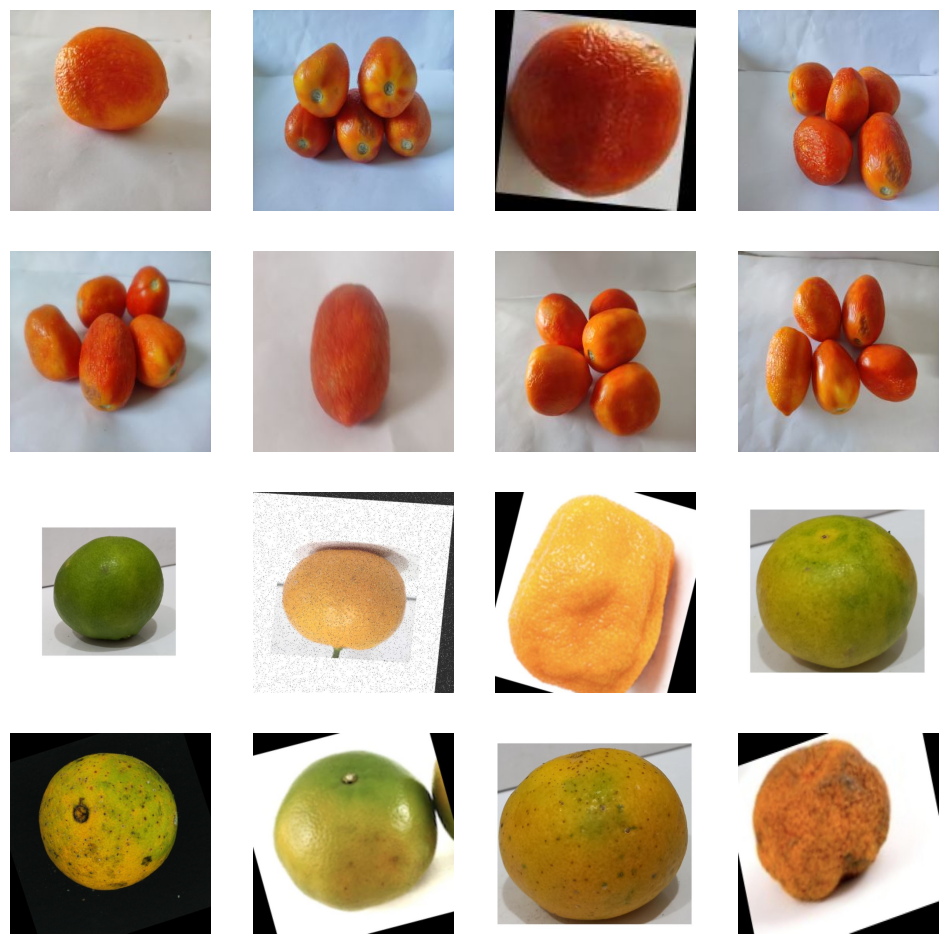

In [11]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0  # Add a line break here

fig = plt.gcf()
fig.set_size_inches(ncols * 3, nrows * 3)

pic_index += 8

next_tomatsegarsedang_pix = [os.path.join(train_tomatsegarsedang_dir, fname)
                            for fname in train_tomatsegarsedang_fnames[pic_index - 8:pic_index]
                            ]

next_jeruksegarsedang_pix = [os.path.join(train_jeruksegarsedang_dir, fname)
                            for fname in train_jeruksegarsedang_fnames[pic_index - 8:pic_index]
                            ]

for i, img_path in enumerate(next_tomatsegarsedang_pix  + next_jeruksegarsedang_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')  # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [18]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('val_accuracy') > 0.60):
      self.model.stop_training = True

custom_callback = myCallback()

#Make Augmentation

In [22]:
img_height = 224
img_width = 224
img_channels = 3
num_epochs = 20

train_datagen = ImageDataGenerator( rescale = 1.0/255.,
                                   #rotation_range=40,
                                   #shear_range=0.2,
                                   #zoom_range=0.2,
                                   #horizontal_flip=True,
                                   vertical_flip=True,
                                   brightness_range=[0.5, 1.5],
                                   channel_shift_range=0.2)
test_datagen  = ImageDataGenerator( rescale = 1.0/255.)

train_generator= train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))
test_generator =  test_datagen.flow_from_directory(test_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 24341 images belonging to 9 classes.
Found 10422 images belonging to 9 classes.


1. Mobile Net V2

* Augmentation = rescale, vertical flip and chanel shift
* batch 32
* with earlystop -> stop ini 8 epoch
* train acc 83
* val acc 55
* with dropout 2 layer (0.2)
* L2 regularizer 2 layer (0.01)
* shape 224 x 224
* adam learning rate 0.01

In [13]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, img_channels))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Choose a specific layer for feature extraction
x = layers.Flatten()(base_model.output)
x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(9, activation='softmax')(x)  # Adjust the number of output classes

model = Model(base_model.input, x)

#early stop
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

9406464/9406464 [==============================] - 0s 0us/step


In [14]:
history = model.fit(train_generator, epochs=num_epochs, validation_data=test_generator, callbacks=[early_stopping])

Epoch 1/10
 34/761 [>.............................] - ETA: 1:42 - loss: 7.4632 - accuracy: 0.4743

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


761/761 [==============================] - 210s 260ms/step - loss: 2.4913 - accuracy: 0.7590 - val_loss: 2.6569 - val_accuracy: 0.5545
Epoch 2/10
761/761 [==============================] - 228s 298ms/step - loss: 1.2774 - accuracy: 0.8399 - val_loss: 2.2807 - val_accuracy: 0.5554
Epoch 3/10
761/761 [==============================] - 214s 281ms/step - loss: 1.1023 - accuracy: 0.8431 - val_loss: 2.1563 - val_accuracy: 0.5528
Epoch 4/10
761/761 [==============================] - 229s 301ms/step - loss: 1.0378 - accuracy: 0.8443 - val_loss: 2.0441 - val_accuracy: 0.5983
Epoch 5/10
761/761 [==============================] - 189s 249ms/step - loss: 1.0164 - accuracy: 0.8399 - val_loss: 1.9091 - val_accuracy: 0.5706
Epoch 6/10
761/761 [==============================] - 213s 280ms/step - loss: 1.0118 - accuracy: 0.8356 - val_loss: 1.7672 - val_accuracy: 0.5746
Epoch 7/10
761/761 [==============================] - 227s 298ms/step - loss: 1.0368 - accuracy: 0.8313 - val_loss: 1.8005 - val_accura

2. CNN 2 filter 32, 64, 128
* callbacks
* dropout 1 layer (0.5)
* kernel 3 x 3
* 35 menit, train_acc 88, val_acc 52


3. CNN 2 filter 64, 128, 256
* callbacks
* dropout 1 layer (0.5)
* kernel 3 x 3
* augmentation rescale, vertical flip and chanel shift
* 45 mn, train acc_95 val_acc 50

In [ ]:
model1 = Sequential()
model1.add(Conv2D(64, (3, 3), input_shape=(img_height, img_width, img_channels)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(9, activation='softmax'))

model1.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

model1.fit(train_generator, epochs=num_epochs, validation_data=test_generator, callbacks=[custom_callback])

Epoch 1/20
761/761 [==============================] - 243s 318ms/step - loss: 1.2686 - accuracy: 0.5860 - val_loss: 1.9772 - val_accuracy: 0.4319
Epoch 2/20
761/761 [==============================] - 240s 316ms/step - loss: 0.8170 - accuracy: 0.7254 - val_loss: 2.2589 - val_accuracy: 0.4482
Epoch 3/20
125/761 [===>..........................] - ETA: 2:39 - loss: 0.6618 - accuracy: 0.7707

326/326 [==============================] - 64s 193ms/step


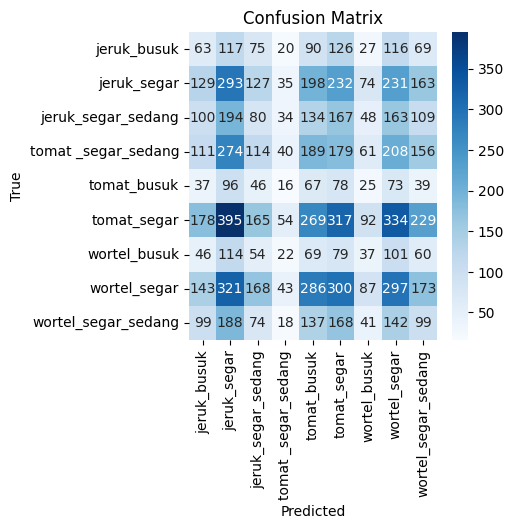


Classification Report:
                      precision    recall  f1-score   support

        jeruk_busuk       0.07      0.09      0.08       703
        jeruk_segar       0.15      0.20      0.17      1482
 jeruk_segar_sedang       0.09      0.08      0.08      1029
tomat _segar_sedang       0.14      0.03      0.05      1332
        tomat_busuk       0.05      0.14      0.07       477
        tomat_segar       0.19      0.16      0.17      2033
       wortel_busuk       0.08      0.06      0.07       582
       wortel_segar       0.18      0.16      0.17      1818
wortel_segar_sedang       0.09      0.10      0.10       966

           accuracy                           0.12     10422
          macro avg       0.11      0.11      0.11     10422
       weighted avg       0.14      0.12      0.12     10422



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# ...

# Setelah Anda melatih model, lakukan prediksi pada data uji
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Dapatkan label yang benar
y_true = test_generator.classes

# Buat confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Tampilkan confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Tampilkan laporan klasifikasi
print('\nClassification Report:\n', classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

Text(0.5, 1.0, 'Training and validation loss')

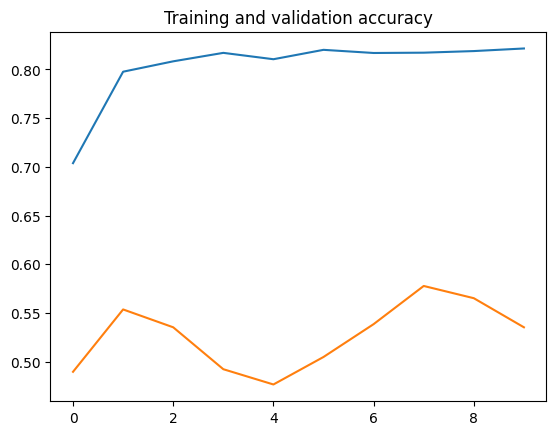

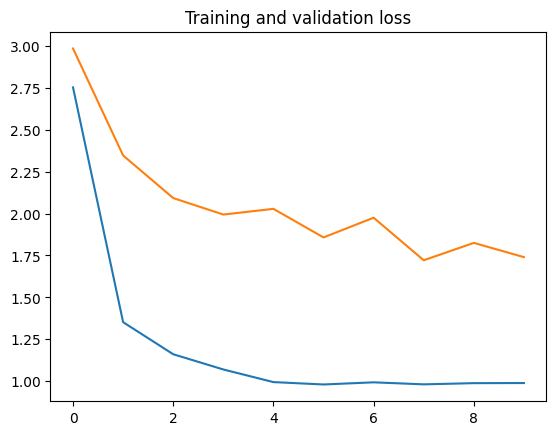

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [ ]:
model.save('/content/')

saved_model_path = '/content/'
saved_model = tf.saved_model.load(saved_model_path)

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
files.download('model.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Quantization-aware training
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Post-training quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
tflite_model = converter.convert()

In [ ]:
# Save the quantized TFLite model to a file
with open('quantized_model.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
# Get the size of the quantized TFLite model
quantized_model_size = os.path.getsize('quantized_model.tflite')
print(f"Quantized TFLite Model Size: {quantized_model_size} bytes")

Quantized TFLite Model Size: 20535060 bytes


Model Description Experiment :

1. CNN-3(Trainacc=98 Valacc=43 time=10m25s)Overfitting
   * epoch 10
   * batch size 20
   * augmentation rescale(val and train)
   * no drop out
2. RestNet50(Trainacc=69,60 valacc=24,35 time=8m51s)Overfitting
   * epoch 10
   * batch size 20
   * augmentation rescale(val and train)
   * no drop out
3. MobileNet(Trainacc=96,89 valacc=52,10 time=11m45s)
   * epoch 10
   * batch size 20
   * augmentation rescale, horizontal flip,vertical flip,zoom range 0.2, fill mode nearest(train) and rescale,zoom range (val)
   * dropout(0,5)
4. MobileNet V2(Train Accuracy=96 val=54 time=23m)
   * input size 224 x 224
   * new dataset
   * double drop out (0,2)